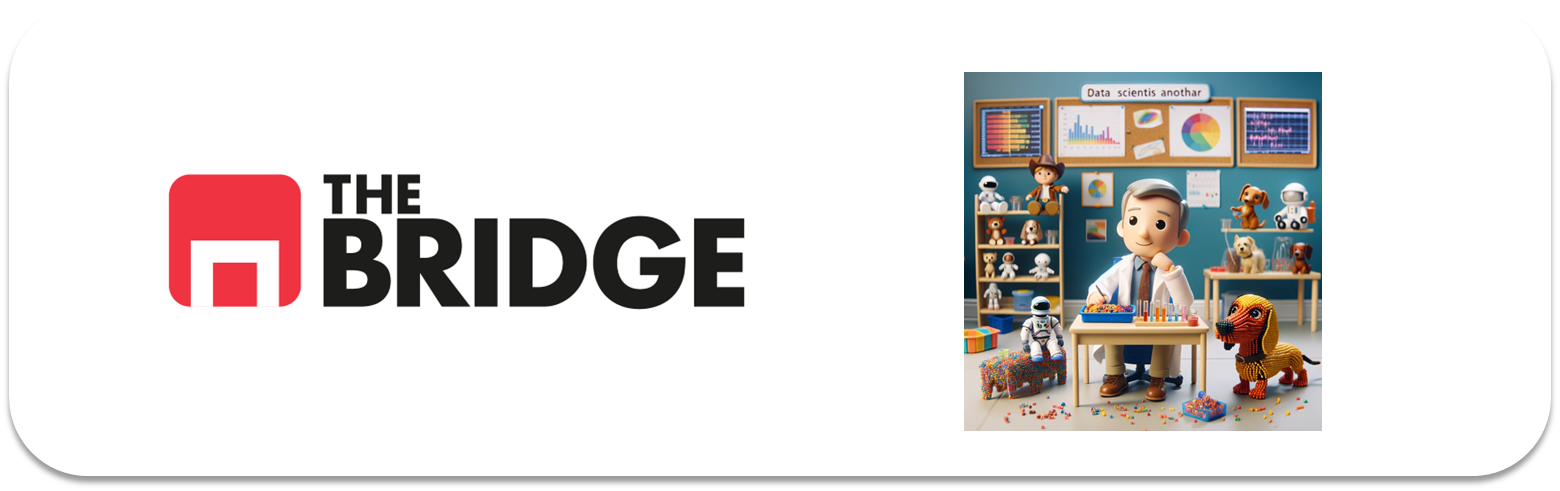

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import *


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [54]:
datasets = sns.get_dataset_names() 
#la libreria seaborn tambien tiene este db de titanic
# los otros son tmabien datasets que estàn disponibles que se pueden utilizar
print(datasets)
df_titanic= sns.load_dataset("titanic")
df_titanic

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [55]:
#df_titanic = pd.read_csv("./data/titanic.csv")


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [56]:
df_titanic=df_titanic.copy()
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [58]:
# PORCENTAGE DE NULOS
df_titanic.isna().sum()
df_titanic.isna().sum() / len(df_titanic) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [59]:
df_titanic.loc[df_titanic.who == "woman", "age"].mean()

np.float64(32.0)

In [60]:
# Imputo el valor por who en age:
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"
media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()
es_age_nulo = df_titanic.age.isna()
df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

In [61]:
df_titanic.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [62]:
df_titanic['age'].mean()

np.float64(30.319458263017587)

In [63]:
#Relleno los nulos de la columna 
# >>embarked con la moda
df_titanic['embarked'] = df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0])
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] = df_titanic.embark_town.mode()[0]
#elimino la columna parch porque no la utilizamos 
# elimino la columna deck porque su % de nulos es del 77% demasiada alta
df_titanic.drop(["parch", "deck"], axis = "columns", inplace=True)

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la inicial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |Tipo|
| ---------------- | ----------- |----|
| survived       | Indica si la persona sobreviviò o no | Binaria|
| pclass      | Indica la classe de viaje | Categorica|
| sex       | Indica el genero | Binaria|
| age       | Indica la edad de los pasajeros | Numerica Discreta|
| sibsp       | Indica el numero de familiares que viajan con la persona | Categorica|
| fare       | Indica el precio pagado del billete | Binaria|
| embarked       | Indica la ciudad desde donde se ha embarcado el pasajero | Binaria|
| class      | Indica la classe de viaje -REDUNDANTE | Categorica|
| who      | Indica el genero -REDUNDANTE | Binaria|
| adult_male      | booleana que indica el genero True si es man, False si woman -REDUNDANTE | bool|
| alive      | Indica si la persona ha sobrevivido -REDUNDANTE | binaria|
| alone      | Indica si el pasajero viaje solo True o no False -REDUNDANTE | bool|



*Podemos constatar que hay columnas redundantes, quizas podemos eliminar algunas y quedarnos solo con las que nos interesan*

| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Indica si el pasajero sobrevivió (1) o no (0) |
| pclass           | Clase del pasaje (1ª, 2ª, 3ª) |
| sex              | Género del pasajero |
| age              | Edad del pasajero |
| sibsp            | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| parch            | Número de padres/hijos a bordo |
| fare             | Tarifa pagada por el pasajero |
| embarked         | Es la incial de la letra de la ciudad donde embarcó la persona.(C = Cherbourg; Q = Queenstown; S = Southampton) |
| class            | Clase del pasaje como categoría (Primera, Segunda, Tercera) |
| who              | Categoría del pasajero (hombre, mujer, niño) |
| adult_male       | Booleano que indica si el pasajero es un hombre adulto |
| deck             | Cubierta del barco donde se ubicaba el pasajero |
| embark_town      | Ciudad de embarque: Cherbourg; Queenstown; Southampton)  |
| alive            | Indica si el pasajero está vivo ('yes') o muerto ('no') |
| alone            | Booleano que indica si el pasajero viajaba solo |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

1. Southampton, UK >> S
2. Cherburgo, FR >> C
3. Queenstown (actualmente conocida como Cobh), Irlanda >> Q
la columna embark_town corresponde da la misma informacion de la columna embarked. Me quedo con una sola de ellas

In [64]:
df_titanic['embarked'] = df_titanic['embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'})

In [65]:
df_titanic['embarked'] = df_titanic['embark_town']
df_titanic.head()

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,Southampton,Third,man,True,Southampton,no,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [78]:
# Primero dividir las variables por tipo, usando la función que programamos en los ejercicios
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)
    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento
    return df_temp
card_tipo(df_titanic)

,Card,%_Card,Tipo,tipo_sugerido
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numerica discreta
sibsp,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria


In [66]:
col_numericas = ["age","fare",]
col_categoricas = ["survived","who","class","embarked","alone"]

### #2.1 Categóricas

In [67]:
# CALCULO DE LA MODA PARA LAS VARIABLES CATEGORICAS
df_titanic[col_categoricas].mode().T

,0
survived,0
who,man
class,Third
embarked,Southampton
alone,True


In [68]:
# CALCULO Y VISUALIZO LA FREQUENCIA RELATIVA
for catego in col_categoricas:
    print(f"Para {catego.upper()}")
    print((df_titanic[catego].value_counts()/len(df_titanic) * 100).round(2), )
    print("\n"*2)

    #para la FRECUENCIA RELATIVA calculo el % sobre el total
    #Es la cardinalidad

Para SURVIVED
survived
0    61.62
1    38.38
Name: count, dtype: float64



Para WHO
who
man      60.27
woman    30.42
child     9.32
Name: count, dtype: float64



Para CLASS
class
Third     55.11
First     24.24
Second    20.65
Name: count, dtype: float64



Para EMBARKED
embarked
Southampton    72.50
Cherbourg      18.86
Queenstown      8.64
Name: count, dtype: float64



Para ALONE
alone
True     60.27
False    39.73
Name: count, dtype: float64





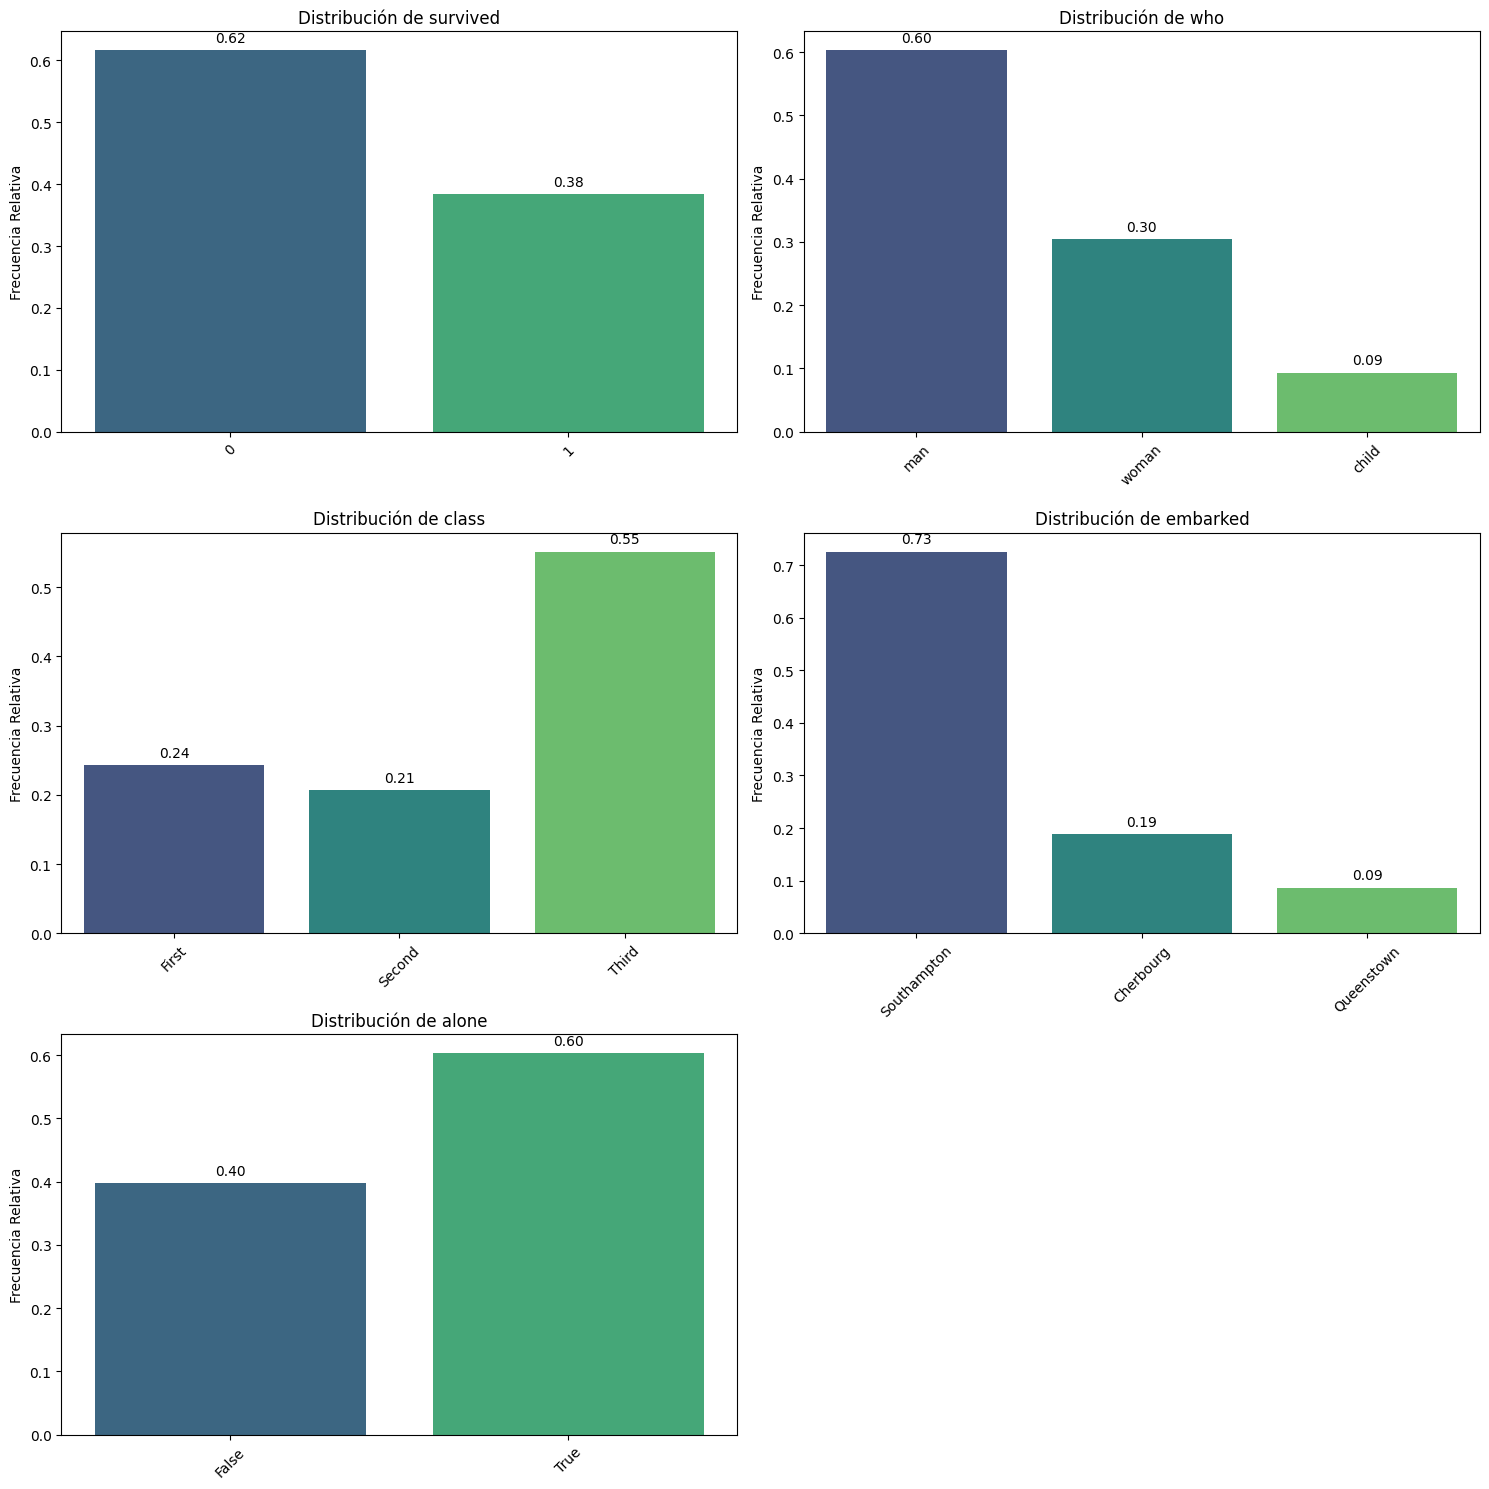

In [79]:
pinta_distribucion_categoricas(df_titanic, col_categoricas, relativa=True, mostrar_valores=True)

CONCLUSIONES DESPUES ANALISIS TENDENCIAS CENTRALES Y VISUALIZACION VAR CATEGORICAS
- el 60% no se ha salvado -ratio muy alto de fallecidos
- la mayoria se ha embarcado en el primer puerto Southampton
- la mayoria viajaba en la tercera clase
- Perfil demografico de los pasajeros:
 - viajaban mas hombres que mujeres
 - no acompañados


### #2.2 Numéricas

In [70]:
df_titanic_num = df_titanic.describe()
#VISUALIZO LOS VALORES TENDENCIA MEDIA DE LAS VARIABLES NUMERICAS
df_titanic_num[col_numericas]

,age,fare
count,891.000000,891.000000
mean,30.319458,32.204208
std,13.063839,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,32.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

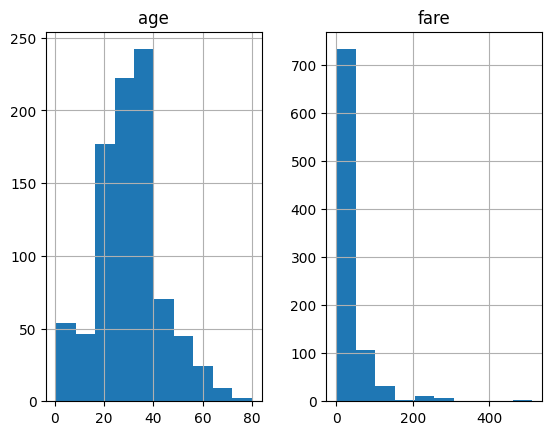

In [71]:
df_titanic[col_numericas].hist()

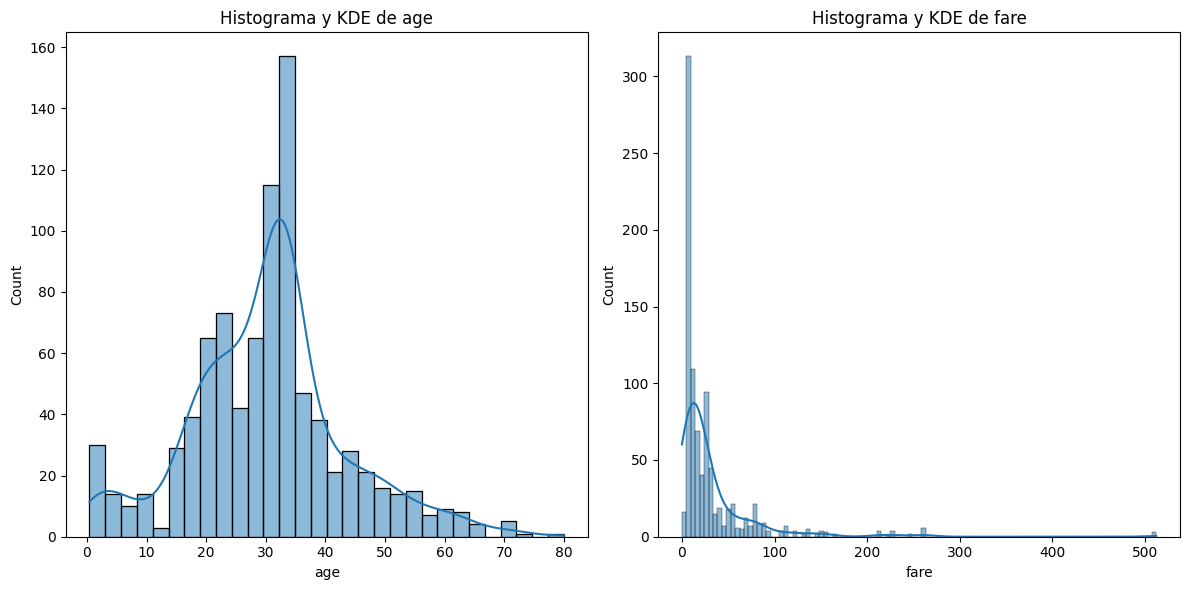

In [72]:
plot_histo_den(df_titanic,col_numericas)

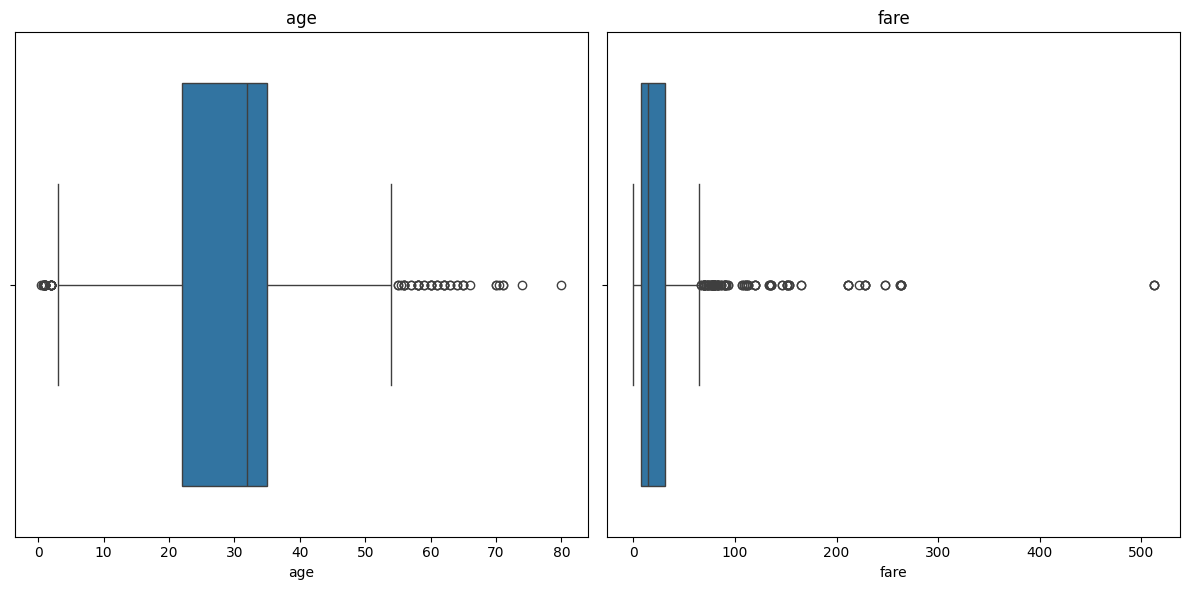

In [89]:
plot_multiple_boxplots(df_titanic, col_numericas)

(2, 2)


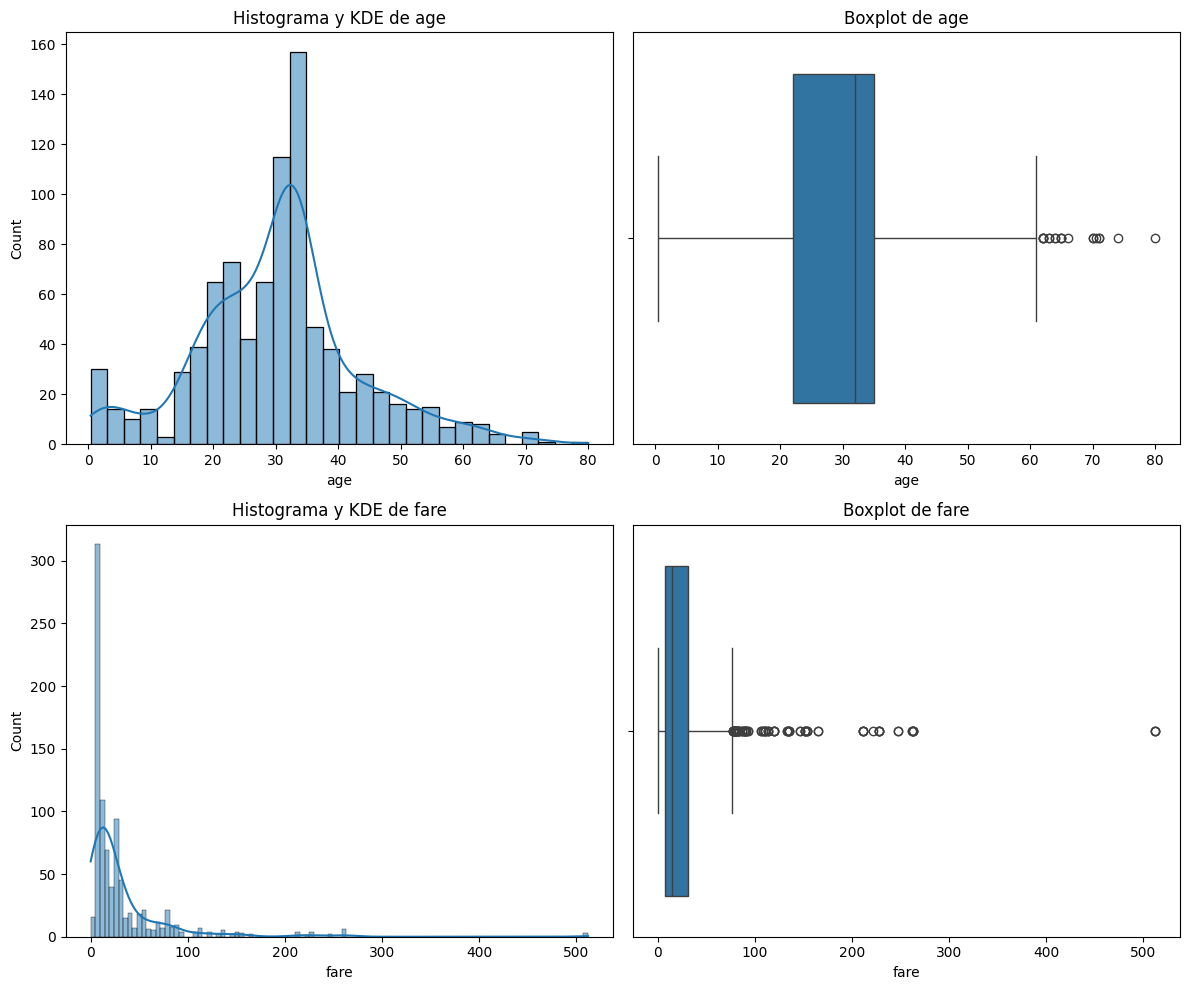

In [97]:
plot_combined_graphs(df_titanic,col_numericas, whisker_width=2)

In [80]:
# Obtenemos sus CVs:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

CONCLUSION ANALISIS TENDENCIAS CENTRALES EDAD y COSTE BILLETE
- la edad de los pasajeros sigue una tendencia gaussiana, la edad media es de 30 años, y el resto se concentra alrededor de esta cifra. Aunque el rango es bastante ancho y habia tambien bebè y niños como gente mayor de mas de 70 años
- el precio del billete medio pagado ha sido de 14,45$, aunque el rango es muy ancho, con min de 0 (probablemente corresponde a los niños no pagantes) hasta 512$ (probablemnte pagados por los pasajeros de primera clase en suite y cabians de lujo)
  - sigue una tendencia logaritmica normal
  - era de esperar que el precio medio se situara en la parte baja porque mas de la mitad de los pasajeros viajaban en tercera clase
